## Data Scraping

In [6]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time

url = "https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats"


headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36"
}


response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    rows = soup.find_all("tr", class_="")
    
    player_data = []

    for row in rows:
        player_info = row.find_all("td")
        if len(player_info) > 1:
            player_row = [info.text.strip() for info in player_info]
            player_data.append(player_row)
        
        # Introduce a delay between requests
        time.sleep(2)

    columns = ["Player", "Nation", "Pos", "Squad", "Comp", "Age", "Born", "MP", "Starts", "Min", "90s", 
               "Gls", "Ast", "G+A", "G-PK", "PK", "PKatt", "CrdY", "CrdR", "xG", "npxG", "xAG", "npxG+xAG", 
               "PrgC", "PrgP", "PrgR", "Gls90", "Ast90", "G+A90", "G-PK90", "G+A-PK90", "xG90", "xAG90", 
               "xG+xAG90", "npxG90", "npxG+xAG90", "Matches"]

    df = pd.DataFrame(player_data, columns=columns)

    df["Nation"] = df["Nation"].str[3:]
    df["Comp"] = df["Comp"].str[3:]

    numeric_columns = ["MP", "Starts", "90s", "Gls", "Ast", "G+A", "G-PK", "PK", "xG", "npxG", "xAG",
                       "npxG+xAG", "PrgC", "PrgP", "PrgR", "Gls90", "Ast90", "G+A90", "G-PK90", "G+A-PK90",
                       "xG90", "xAG90", "xG+xAG90", "npxG90", "npxG+xAG90"]
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")

    # Save DataFrame to CSV locally
    df.to_csv("player_stats.csv", index=False)

    print(df.head())

else:
    print("Failed to fetch the data. Status code:", response.status_code)


             Player Nation    Pos           Squad             Comp Age  Born  \
0  Brenden Aaronson    USA  MF,FW    Leeds United   Premier League  21  2000   
1   Paxten Aaronson    USA  MF,DF  Eint Frankfurt       Bundesliga  18  2003   
2    James Abankwah    IRL     DF         Udinese          Serie A  18  2004   
3     George Abbott    ENG     MF       Tottenham   Premier League  16  2005   
4  Yunis Abdelhamid    MAR     DF           Reims          Ligue 1  34  1987   

   MP  Starts    Min  ...  Ast90  G+A90  G-PK90  G+A-PK90  xG90  xAG90  \
0  36      28  2,372  ...   0.11   0.15    0.04      0.15  0.15   0.16   
1   7       0    173  ...   0.00   0.00    0.00      0.00  0.09   0.03   
2   2       1     63  ...   0.00   0.00    0.00      0.00  0.00   0.00   
3   1       0      1  ...   0.00   0.00    0.00      0.00  0.00   0.00   
4  37      37  3,330  ...   0.05   0.08    0.03      0.08  0.06   0.03   

  xG+xAG90 npxG90 npxG+xAG90  Matches  
0     0.31   0.15       0.31  Matc

In [7]:
df

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Ast90,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90,Matches
0,Brenden Aaronson,USA,"MF,FW",Leeds United,Premier League,21,2000,36,28,"2,372",...,0.11,0.15,0.04,0.15,0.15,0.16,0.31,0.15,0.31,Matches
1,Paxten Aaronson,USA,"MF,DF",Eint Frankfurt,Bundesliga,18,2003,7,0,173,...,0.00,0.00,0.00,0.00,0.09,0.03,0.11,0.09,0.11,Matches
2,James Abankwah,IRL,DF,Udinese,Serie A,18,2004,2,1,63,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
3,George Abbott,ENG,MF,Tottenham,Premier League,16,2005,1,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
4,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34,1987,37,37,"3,330",...,0.05,0.08,0.03,0.08,0.06,0.03,0.09,0.06,0.09,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,Szymon Żurkowski,POL,MF,Fiorentina,Serie A,24,1997,2,0,32,...,2.81,2.81,0.00,2.81,0.33,0.06,0.40,0.33,0.40,Matches
2885,Szymon Żurkowski,POL,MF,Spezia,Serie A,24,1997,10,3,427,...,0.00,0.00,0.00,0.00,0.12,0.00,0.12,0.12,0.12,Matches
2886,Martin Ødegaard,NOR,MF,Arsenal,Premier League,23,1998,37,37,"3,127",...,0.20,0.63,0.43,0.63,0.29,0.23,0.52,0.29,0.52,Matches
2887,Milan Đurić,BIH,FW,Hellas Verona,Serie A,32,1990,28,14,"1,366",...,0.07,0.13,0.07,0.13,0.09,0.08,0.18,0.09,0.18,Matches


In [8]:
football_df = pd.read_csv('./player_stats.csv')

In [10]:
football_df = football_df.iloc[:, :-1]

In [12]:
football_df = football_df.fillna(0.00)

In [14]:
football_df

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90
0,Brenden Aaronson,USA,"MF,FW",Leeds United,Premier League,21,2000,36,28,"2,372",...,0.04,0.11,0.15,0.04,0.15,0.15,0.16,0.31,0.15,0.31
1,Paxten Aaronson,USA,"MF,DF",Eint Frankfurt,Bundesliga,18,2003,7,0,173,...,0.00,0.00,0.00,0.00,0.00,0.09,0.03,0.11,0.09,0.11
2,James Abankwah,IRL,DF,Udinese,Serie A,18,2004,2,1,63,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,George Abbott,ENG,MF,Tottenham,Premier League,16,2005,1,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34,1987,37,37,"3,330",...,0.03,0.05,0.08,0.03,0.08,0.06,0.03,0.09,0.06,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,Szymon Żurkowski,POL,MF,Fiorentina,Serie A,24,1997,2,0,32,...,0.00,2.81,2.81,0.00,2.81,0.33,0.06,0.40,0.33,0.40
2885,Szymon Żurkowski,POL,MF,Spezia,Serie A,24,1997,10,3,427,...,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.12,0.12,0.12
2886,Martin Ødegaard,NOR,MF,Arsenal,Premier League,23,1998,37,37,"3,127",...,0.43,0.20,0.63,0.43,0.63,0.29,0.23,0.52,0.29,0.52
2887,Milan Đurić,BIH,FW,Hellas Verona,Serie A,32,1990,28,14,"1,366",...,0.07,0.07,0.13,0.07,0.13,0.09,0.08,0.18,0.09,0.18


In [27]:
wages_df = pd.read_csv('./player_wages_clean.csv')

In [28]:
wages_df

,Player,Nationality,Position,Age,Weekly Wages,Annual Wages
0,Kylian Mbappé,FRA,FW,23,1514022,78729163
1,Lionel Messi,ARG,"FW,MF",35,1338228,69587833
2,Neymar,BRA,"MF,FW",30,1185143,61627439
3,Keylor Navas,CRC,GK,35,344020,17889015
4,Achraf Hakimi,MAR,"DF,MF",23,305959,15909852
...,...,...,...,...,...,...
5064,Joško Gvardiol,CRO,DF,20,23551,1224676
5065,Amadou Haidara,MLI,MF,24,21028,1093461
5066,Janis Blaswich,GER,GK,31,7780,404580
5067,Hugo Novoa,ESP,MF,19,5678,295234


In [29]:
wages_df = wages_df.drop(["Nationality", "Position", "Age"], axis=1)

In [30]:
wages_df

,Player,Weekly Wages,Annual Wages
0,Kylian Mbappé,1514022,78729163
1,Lionel Messi,1338228,69587833
2,Neymar,1185143,61627439
3,Keylor Navas,344020,17889015
4,Achraf Hakimi,305959,15909852
...,...,...,...
5064,Joško Gvardiol,23551,1224676
5065,Amadou Haidara,21028,1093461
5066,Janis Blaswich,7780,404580
5067,Hugo Novoa,5678,295234


In [31]:
players_df = football_df.merge(wages_df, left_on="Player", right_on="Player", how="inner")


In [34]:
players_df.to_csv("complete_players.csv", index=False)

In [4]:
players_df = pd.read_csv('./complete_players.csv')

In [5]:
players_df

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90,Weekly Wages,Annual Wages
0,Brenden Aaronson,USA,"MF,FW",Leeds United,Premier League,21,2000,36,28,"2,372",...,0.15,0.04,0.15,0.15,0.16,0.31,0.15,0.31,57195,2974157
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,34,1987,37,37,"3,330",...,0.08,0.03,0.08,0.06,0.03,0.09,0.06,0.09,25234,1312153
2,Himad Abdelli,ALG,"MF,FW",Angers,Ligue 1,22,1999,30,24,"2,137",...,0.17,0.08,0.17,0.06,0.12,0.18,0.06,0.18,2523,131215
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,33,33,"2,894",...,0.06,0.03,0.06,0.03,0.05,0.08,0.03,0.08,5678,295234
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,29,1993,29,28,"2,342",...,0.04,0.00,0.04,0.02,0.05,0.07,0.02,0.07,5047,262431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,23,1999,36,35,"3,101",...,0.12,0.03,0.12,0.06,0.06,0.11,0.06,0.11,63084,3280382
2291,Szymon Żurkowski,POL,MF,Fiorentina,Serie A,24,1997,2,0,32,...,2.81,0.00,2.81,0.33,0.06,0.40,0.33,0.40,19556,1016918
2292,Martin Ødegaard,NOR,MF,Arsenal,Premier League,23,1998,37,37,"3,127",...,0.63,0.43,0.63,0.29,0.23,0.52,0.29,0.52,146166,7600623
2293,Milan Đurić,BIH,FW,Hellas Verona,Serie A,32,1990,28,14,"1,366",...,0.13,0.07,0.13,0.09,0.08,0.18,0.09,0.18,18925,984115


In [6]:
players_df.isnull().sum()

Player          0
Nation          0
Pos             0
Squad           0
Comp            0
Age             0
Born            0
MP              0
Starts          0
Min             0
90s             0
Gls             0
Ast             0
G+A             0
G-PK            0
PK              0
PKatt           0
CrdY            0
CrdR            0
xG              0
npxG            0
xAG             0
npxG+xAG        0
PrgC            0
PrgP            0
PrgR            0
Gls90           0
Ast90           0
G+A90           0
G-PK90          0
G+A-PK90        0
xG90            0
xAG90           0
xG+xAG90        0
npxG90          0
npxG+xAG90      0
Weekly Wages    0
Annual Wages    0
dtype: int64

In [7]:
players_df.loc[players_df['Player'] == 'Luis Díaz']

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90,Weekly Wages,Annual Wages
582,Luis Díaz,COL,FW,Liverpool,Premier League,25,1997,17,11,996,...,0.54,0.36,0.54,0.22,0.14,0.36,0.22,0.36,69905,3635081


In [42]:
players_df = players_df.drop_duplicates(subset='Player')

In [45]:
#players_df.to_csv("complete_playersv2.csv", index=False)

In [92]:
players_df = pd.read_csv('./complete_playersv2.csv')

In [157]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        2295 non-null   object 
 1   Nation        2295 non-null   object 
 2   Pos           2295 non-null   object 
 3   Squad         2295 non-null   object 
 4   Comp          2295 non-null   object 
 5   Age           2295 non-null   int64  
 6   Born          2295 non-null   int64  
 7   MP            2295 non-null   int64  
 8   Starts        2295 non-null   int64  
 9   Min           2295 non-null   object 
 10  90s           2295 non-null   float64
 11  Gls           2295 non-null   int64  
 12  Ast           2295 non-null   int64  
 13  G+A           2295 non-null   int64  
 14  G-PK          2295 non-null   int64  
 15  PK            2295 non-null   int64  
 16  PKatt         2295 non-null   int64  
 17  CrdY          2295 non-null   int64  
 18  CrdR          2295 non-null 

### Glossary
Nation -- Nationality of the player.
First, we check our records in international play at senior level.
Then youth level.
Then citizenship presented on wikipedia.
Finally, we use their birthplace when available.

Pos -- Position
Position most commonly played by the player
GK - Goalkeepers
DF - Defenders
MF - Midfielders
FW - Forwards
FB - Fullbacks
LB - Left Backs
RB - Right Backs
CB - Center Backs
DM - Defensive Midfielders
CM - Central Midfielders
LM - Left Midfielders
RM - Right Midfielders
WM - Wide Midfielders
LW - Left Wingers
RW - Right Wingers
AM - Attacking Midfielders

Comp -- Competition
Competition
Number next to competition states which level in the country's league pyramid this league occupies.

Age -- Age at season start
Given on August 1 for winter leagues
and February 1 for summer leagues.

Born -- Year of birth
Playing Time

MP -- Matches Played
Matches Played by the player or squad

Starts -- Game or games started by player

Min -- Minutes

90s -- 90s Played
90s played
Minutes played divided by 90
Performance

Gls -- Goals
Goals scored or allowed

Ast -- Assists
Assists

G+A -- Goals + Assists
Goals and Assists

G-PK -- Non-Penalty Goals
Non-Penalty Goals

PK -- Penalty Kicks Made
Penalty Kicks Made

PKatt -- Penalty Kicks Attempted
Penalty Kicks Attempted

CrdY -- Yellow Cards
Yellow Cards

CrdR -- Red Cards
Red Cards
Expected

xG -- Expected Goals
xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).
Provided by Opta.
An underline indicates there is a match that is missing data, but will be updated when available.

npxG -- Non-Penalty xG
Non-Penalty Expected Goals
Provided by Opta.
An underline indicates there is a match that is missing data, but will be updated when available.

xAG -- Expected Assisted Goals
xG which follows a pass that assists a shot
Provided by Opta.
An underline indicates there is a match that is missing data, but will be updated when available.

npxG+xAG -- npxG + xAG
Non-Penalty Expected Goals plus Assisted Goals
xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).
Provided by Opta.
An underline indicates there is a match that is missing data, but will be updated when available.
Minimum 30 minutes played per squad game to qualify as a leader

Progression

PrgC -- Progressive Carries
Carries that move the ball towards the opponent's goal line at least 10 yards from its furthest point in the last six passes, or any carry into the penalty area. Excludes carries which end in the defending 50% of the pitch

PrgP -- Progressive Passes
Progressive Passes
Completed passes that move the ball towards the opponent's goal line at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area. Excludes passes from the defending 40% of the pitch

PrgR -- Progressive Passes Rec
Progressive Passes Received
Completed passes that move the ball towards the opponent's goal line at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area. Excludes passes from the defending 40% of the pitch
Per 90 Minutes

Gls -- Goals/90
Goals Scored per 90 minutes
Minimum 30 minutes played per squad game to qualify as a leader

Ast -- Assists/90
Assists per 90 minutes
Minimum 30 minutes played per squad game to qualify as a leader

G+A -- Goals + Assists/90
Goals and Assists per 90 minutes
Minimum 30 minutes played per squad game to qualify as a leader

G-PK -- Non-Penalty Goals/90
Goals minus Penalty Kicks made per 90 minutes
Minimum 30 minutes played per squad game to qualify as a leader

G+A-PK -- Non-Penalty Goals + Assists/90
Goals plus Assists minus Penalty Kicks made per 90 minutes
Minimum 30 minutes played per squad game to qualify as a leader

xG -- xG/90
Expected Goals per 90 minutes
xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).
Provided by Opta.
An underline indicates there is a match that is missing data, but will be updated when available.
Minimum 30 minutes played per squad game to qualify as a leader

xAG -- xAG/90
Expected Assisted Goals per 90 minutes
Provided by Opta.
An underline indicates there is a match that is missing data, but will be updated when available.
Minimum 30 minutes played per squad game to qualify as a leader

xG+xAG -- xG + xAG/90
Expected Goals plus Assisted Goals per 90 minutes
xG totals include penalty kicks, but do not include penalty shootouts (unless otherwise noted).
Provided by Opta.
An underline indicates there is a match that is missing data, but will be updated when available.
Minimum 30 minutes played per squad game to qualify as a leader

npxG -- npxG/90
Non-Penalty Expected Goals per 90 minutes
Provided by Opta.
An underline indicates there is a match that is missing data, but will be updated when available.
Minimum 30 minutes played per squad game to qualify as a leader

npxG+xAG -- npxG + xAG
Non-Penalty Expected Goals plus Assisted Goals per 90 minutes
Provided by Opta.
An underline indicates there is a match that is missing data, but will be updated when available.
Minimum 30 minutes played per squad game to qualify as a leader

In [94]:
players_df.loc[players_df['Player'] == 'Luis Díaz']

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90,Weekly Wages,Annual Wages
582,Luis Díaz,COL,FW,Liverpool,Premier League,25,1997,17,11,996,...,0.54,0.36,0.54,0.22,0.14,0.36,0.22,0.36,69905,3635081


## Data analysis trials

In [49]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


numerical_features = players_df.select_dtypes(include=[np.number])


columns_to_drop = ['Weekly Wages', 'Annual Wages', 'Player', 'Nation', 'Pos', 'Squad', 'Comp']
columns_to_drop = [col for col in columns_to_drop if col in numerical_features.columns]

numerical_features = numerical_features.drop(columns=columns_to_drop)


numerical_features = numerical_features.replace(',', '', regex=True).astype(float)

X = numerical_features
y = players_df['Weekly Wages']

In [30]:
import statsmodels.api as sm


X = sm.add_constant(numerical_features)


model = sm.OLS(players_df['Annual Wages'], X)
results = model.fit()


print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           Annual Wages   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     22.42
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          9.81e-100
Time:                        11:51:02   Log-Likelihood:                -38197.
No. Observations:                2295   AIC:                         7.645e+04
Df Residuals:                    2266   BIC:                         7.662e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.423e+08   3.68e+08      0.386      0.6

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Annual Wages   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     22.42
Date:                Fri, 30 Jun 2023   Prob (F-statistic):          9.81e-100
Time:                        11:51:05   Log-Likelihood:                -38197.
No. Observations:                2295   AIC:                         7.645e+04
Df Residuals:                    2266   BIC:                         7.662e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.423e+08   3.68e+08      0.386      0.699    -5.8e+08    8.64e+08
Age         1.387e+05   1.82e+05      0.760      0.447   -2.19e+05    4.96e+05
Born       -7.198e+04   1.82e+05     -0.395      0.693   -4.29e+05    2.85e+05
MP         -1.246e+05   2.18e+04     -5.719      0.000   -1.67e+05   -8.19e+04
Starts     -2.001e+05   7.12e+04     -2.812      0.005    -3.4e+05   -6.05e+04
90s         2.702e+05   8.23e+04      3.284      0.001    1.09e+05    4.32e+05
Gls         9.696e+04    1.5e+05      0.646      0.518   -1.97e+05    3.91e+05
Ast         9.035e+04   9.12e+04      0.991      0.322   -8.84e+04    2.69e+05
G+A         1.873e+05   8.23e+04      2.276      0.023     2.6e+04    3.49e+05
G-PK        -1.67e+05   2.23e+05     -0.748      0.454   -6.05e+05    2.71e+05
PK           2.64e+05   3.64e+05      0.725      0.469    -4.5e+05    9.78e+05
PKatt      -3.034e+06   1.87e+06     -1.620      0.105   -6.71e+06    6.39e+05
CrdY       -1.316e+05   4.13e+04     -3.184      0.001   -2.13e+05   -5.06e+04
CrdR        8.271e+04   2.12e+05      0.390      0.697   -3.34e+05    4.99e+05
xG          2.589e+06   2.36e+06      1.097      0.273   -2.04e+06    7.22e+06
npxG       -3.389e+06   2.94e+06     -1.153      0.249   -9.15e+06    2.38e+06
xAG        -1.223e+06   1.92e+06     -0.638      0.524   -4.99e+06    2.54e+06
npxG+xAG    1.264e+06   1.92e+06      0.657      0.511   -2.51e+06    5.03e+06
PrgC        1.205e+04   7099.874      1.697      0.090   -1872.151     2.6e+04
PrgP         1.96e+04   2744.073      7.142      0.000    1.42e+04     2.5e+04
PrgR       -8614.5652   3606.123     -2.389      0.017   -1.57e+04   -1542.916
Gls90       1.303e+07   5.68e+07      0.229      0.819   -9.84e+07    1.24e+08
Ast90       -2.16e+06   2.66e+07     -0.081      0.935   -5.44e+07    5.01e+07
G+A90      -3.905e+07    5.7e+07     -0.685      0.493   -1.51e+08    7.27e+07
G-PK90     -1.513e+07   5.54e+07     -0.273      0.785   -1.24e+08    9.35e+07
G+A-PK90    4.091e+07   5.55e+07      0.737      0.461   -6.79e+07     1.5e+08
xG90        1.351e+07   4.33e+07      0.312      0.755   -7.14e+07    9.85e+07
xAG90       2.165e+05   1.89e+07      0.011      0.991   -3.69e+07    3.73e+07
xG+xAG90     2.07e+07   4.38e+07      0.472      0.637   -6.53e+07    1.07e+08
npxG90     -1.353e+07   4.37e+07     -0.310      0.757   -9.92e+07    7.22e+07
npxG+xAG90 -1.951e+07   4.42e+07     -0.441      0.659   -1.06e+08    6.72e+07
==============================================================================
Omnibus:                     2389.095   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           257755.470
Skew:                           4.893   Prob(JB):                         0.00
Kurtosis:                      53.987   Cond. No.                     1.00e+16
==

In [97]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


numerical_features = players_df.select_dtypes(include=[np.number])


columns_to_drop = ['Weekly Wages', 'Annual Wages', 'Player', 'Nation', 'Pos', 'Squad', 'Comp']
columns_to_drop = [col for col in columns_to_drop if col in numerical_features.columns]


numerical_features = numerical_features.drop(columns=columns_to_drop)


numerical_features = numerical_features.replace(',', '', regex=True).astype(float)

X = numerical_features
y = players_df['Weekly Wages']

degree = 2  


X_sq = pd.DataFrame()
for col in X.columns:
    X_sq[col] = X[col]
    X_sq[col + '_squared'] = X[col] ** 2

X_sq = sm.add_constant(X_sq)

model_poly = sm.OLS(y, X_sq)
results_poly = model_poly.fit()




In [98]:

# Print the summary
results_poly.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly Wages   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     20.27
Date:                Mon, 03 Jul 2023   Prob (F-statistic):          8.38e-163
Time:                        09:50:41   Log-Likelihood:                -28925.
No. Observations:                2295   AIC:                         5.797e+04
Df Residuals:                    2236   BIC:                         5.831e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.706e+09   1.51e+09     -2.458      0.014   -6.66e+09   -7.49e+08
Age                -3.954e+04      2e+04     -1.982      0.048   -7.87e+04    -413.523
Age_squared          807.0558    377.841      2.136      0.033      66.100    1548.012
Born                3.716e+06   1.51e+06      2.458      0.014    7.52e+05    6.68e+06
Born_squared        -931.2026    378.691     -2.459      0.014   -1673.824    -188.581
MP                    -1.6985   1217.296     -0.001      0.999   -2388.847    2385.450
MP_squared           -20.0115     25.694     -0.779      0.436     -70.398      30.375
Starts              5544.5061   2954.711      1.876      0.061    -249.757    1.13e+04
Starts_squared      -176.5839     71.170     -2.481      0.013    -316.150     -37.018
90s                  -64.9441   3792.006     -0.017      0.986   -7501.165    7371.277
90s_squared           52.8103     86.719      0.609      0.543    -117.249     222.869
Gls                 1.019e+04   4271.002      2.385      0.017    1809.880    1.86e+04
Gls_squared         -380.1865    556.938     -0.683      0.495   -1472.357     711.984
Ast                -5823.6264   2779.655     -2.095      0.036   -1.13e+04    -372.653
Ast_squared          584.8017    402.561      1.453      0.146    -204.631    1374.234
G+A                 4361.7979   2435.674      1.791      0.073    -414.620    9138.216
G+A_squared           41.3875    164.531      0.252      0.801    -281.261     364.036
G-PK               -1.989e+04   6634.526     -2.997      0.003   -3.29e+04   -6874.990
G-PK_squared         616.7316    615.880      1.001      0.317    -591.025    1824.488
PK                  3.007e+04   1.06e+04      2.846      0.004    9348.959    5.08e+04
PK_squared         -6277.5046   2324.495     -2.701      0.007   -1.08e+04   -1719.110
PKatt              -7.916e+04    3.5e+04     -2.259      0.024   -1.48e+05   -1.05e+04
PKatt_squared       1559.8503   1826.160      0.854      0.393   -2021.295    5140.996
CrdY               -2946.7425   1879.029     -1.568      0.117   -6631.566     738.081
CrdY_squared          91.5760    170.630      0.537      0.592    -243.033     426.185
CrdR                2722.7819   8370.002      0.325      0.745   -1.37e+04    1.91e+04
CrdR_squared       -1932.5892   4390.498     -0.440      0.660   -1.05e+04    6677.288
xG                  3.592e+04   4.38e+04      0.820      0.412      -5e+04    1.22e+05
xG_squared          1239.9166    657.461      1.886      0.059     -49.382    2529.215
npxG               -5.287e+04   5.38e+04     -0.982      0.326   -1.58e+05    5.27e+04
npxG_squared       -1814.8879    844.624     -2.149      0.032   -3471.217    -158.558
xAG                 -1.87e+04   3.45e+04     -0.542      0.588   -8.64e+04     4.9e+04
xAG_squared        -1212.0914    554.5

# Clustering

/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


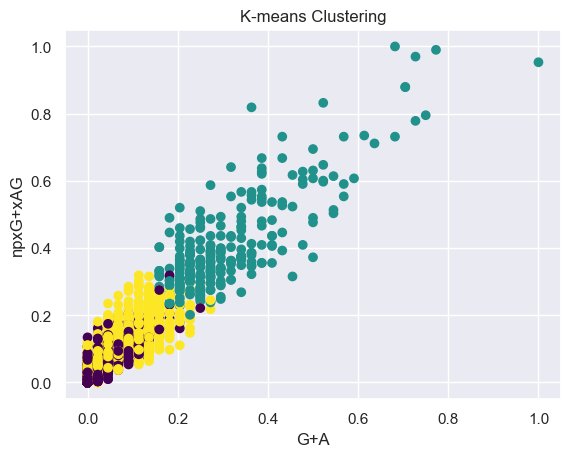

In [164]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


numerical_features = ['Age', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'G-PK', 'xG', 'xAG', 'npxG', 'npxG+xAG']

# Remove commas from numerical features and convert to float
for feature in numerical_features:
    if players_df[feature].dtype == 'O':  # Check if the feature is of object type (string)
        players_df[feature] = players_df[feature].str.replace(',', '').astype(float)

# Perform scaling 
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(players_df[numerical_features])


kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)


players_df['Cluster'] = clusters


plt.scatter(df_scaled[:, 6], df_scaled[:, -1], c=clusters, cmap='viridis')
plt.xlabel('G+A')
plt.ylabel('npxG+xAG')
plt.title('K-means Clustering')
plt.show()



In [165]:
k = 5  # Set the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Perform clustering
kmeans.fit(players_df[numerical_features])

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the dataset
players_df['Cluster'] = cluster_labels

# Print the cluster assignments
print(players_df[['Player', 'Cluster']])

                 Player  Cluster
0      Brenden Aaronson        0
1      Yunis Abdelhamid        4
2         Himad Abdelli        0
3     Salis Abdul Samed        4
4       Laurent Abergel        0
...                 ...      ...
2290   Martín Zubimendi        4
2291   Szymon Żurkowski        3
2292    Martin Ødegaard        4
2293        Milan Đurić        2
2294      Filip Đuričić        0

[2295 rows x 2 columns]


/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


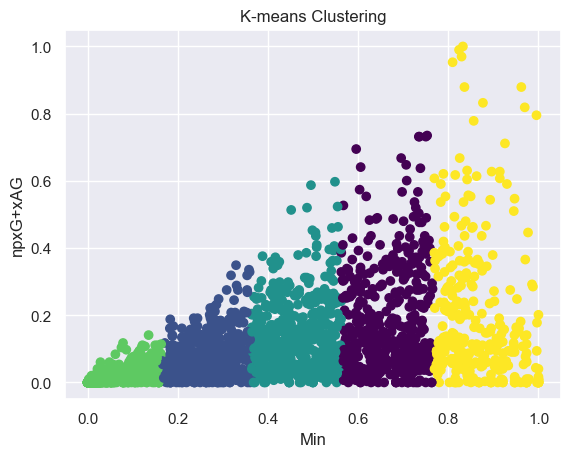

In [166]:
# Visualize the clusters
plt.scatter(df_scaled[:, 3], df_scaled[:, -1], c=cluster_labels, cmap='viridis')
plt.xlabel('Min')
plt.ylabel('npxG+xAG')
plt.title('K-means Clustering')
plt.show()

In [167]:
import seaborn as sns
sns.set()

/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Felipe/an

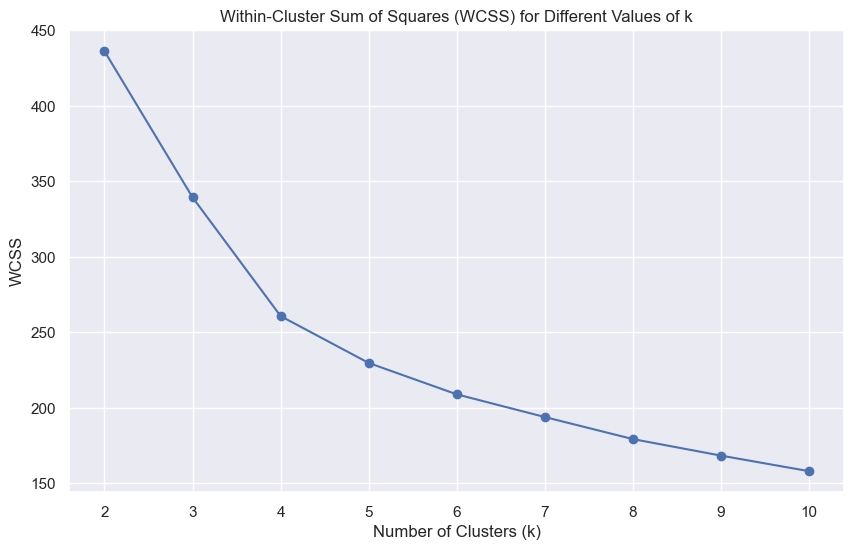

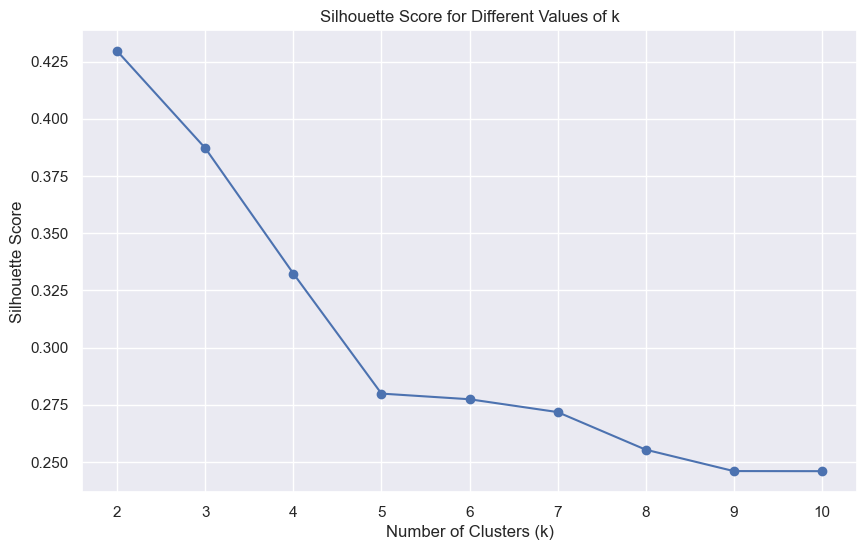

In [168]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = players_df[numerical_features]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

def evaluate_clustering(k, X, cluster_labels):
    kmeans = KMeans(n_clusters=k, random_state=50)
    kmeans.fit(X)
    
    # Calculate WCSS
    wcss = kmeans.inertia_
    
    # Calculate silhouette score
    silhouette = silhouette_score(X, kmeans.labels_)
    
    return wcss, silhouette

# Try different values of k
k_values = range(2, 11)
wcss_scores = []
silhouette_scores = []

for k in k_values:
    wcss, silhouette = evaluate_clustering(k, X_scaled, cluster_labels)
    wcss_scores.append(wcss)
    silhouette_scores.append(silhouette)

# Plot the WCSS scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Within-Cluster Sum of Squares (WCSS) for Different Values of k')
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()


In [116]:
k = 3 # Set the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Perform clustering
kmeans.fit(players_df[numerical_features])

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the dataset
players_df['Cluster'] = cluster_labels

# Print the cluster assignments
print(players_df[['Player', 'Cluster']])

                 Player  Cluster
0      Brenden Aaronson        1
1      Yunis Abdelhamid        1
2         Himad Abdelli        1
3     Salis Abdul Samed        1
4       Laurent Abergel        1
...                 ...      ...
2290   Martín Zubimendi        1
2291   Szymon Żurkowski        0
2292    Martin Ødegaard        1
2293        Milan Đurić        2
2294      Filip Đuričić        1

[2295 rows x 2 columns]


/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [118]:
for cluster in range(k):
    cluster_data = players_df[players_df['Cluster'] == cluster]['Player']
    print("Cluster", cluster)
    print(cluster_data)
    print()

Cluster 0
5         Matthis Abline
8       Christian Acella
10          Mohamed Achi
14        Sargis Adamyan
18           Yacine Adli
              ...       
2283        Hakim Ziyech
2284         Jeroen Zoet
2286        Nadir Zortea
2288         Petar Zovko
2291    Szymon Żurkowski
Name: Player, Length: 821, dtype: object

Cluster 1
0          Brenden Aaronson
1          Yunis Abdelhamid
2             Himad Abdelli
3         Salis Abdul Samed
4           Laurent Abergel
               ...         
2281    Oleksandr Zinchenko
2289          Igor Zubeldia
2290       Martín Zubimendi
2292        Martin Ødegaard
2294          Filip Đuričić
Name: Player, Length: 671, dtype: object

Cluster 2
11          Marcos Acuña
12             Che Adams
15      Tosin Adarabioyo
16         Karim Adeyemi
17            Amine Adli
              ...       
2274        Arber Zeneli
2278       Edon Zhegrova
2285        Simon Zoller
2287          Kurt Zouma
2293         Milan Đurić
Name: Player, Length: 803, d

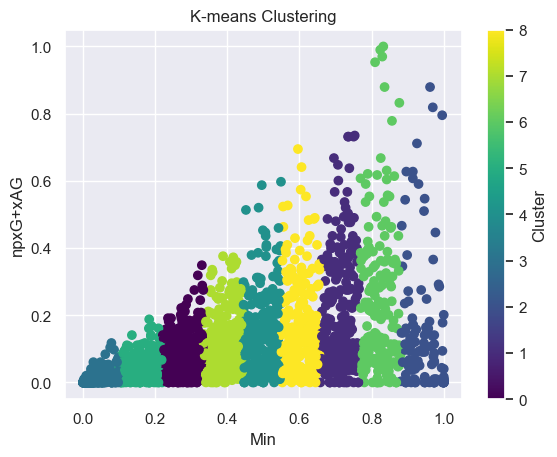

In [140]:
# Visualize the clusters
plt.scatter(df_scaled[:, 3], df_scaled[:, -1], c=cluster_labels, cmap='viridis')
plt.xlabel('Min')
plt.ylabel('npxG+xAG')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [123]:
players_df.loc[players_df['Player'] == 'Lionel Messi']

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90,Weekly Wages,Annual Wages,Cluster
1415,Lionel Messi,ARG,"FW,MF",Paris S-G,Ligue 1,35,1987,32,32,2837.0,...,0.51,1.02,0.49,0.43,0.92,0.49,0.92,1338228,69587833,1


In [124]:
players_df.loc[players_df['Player'] == 'Erling Haaland']

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90,Weekly Wages,Annual Wages,Cluster
899,Erling Haaland,NOR,FW,Manchester City,Premier League,22,2000,35,33,2769.0,...,0.94,1.2,0.92,0.17,1.1,0.75,0.92,476628,24784640,1


In [125]:
players_df.loc[players_df['Player'] == 'Kylian Mbappé']

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90,Weekly Wages,Annual Wages,Cluster
1376,Kylian Mbappé,FRA,FW,Paris S-G,Ligue 1,23,1998,34,32,2818.0,...,0.83,0.99,0.84,0.23,1.07,0.71,0.94,1514022,78729163,1


In [126]:
cluster_1_data = players_df[players_df['Cluster'] == 1]
print(cluster_1_data[['Player']])

                   Player
0        Brenden Aaronson
1        Yunis Abdelhamid
2           Himad Abdelli
3       Salis Abdul Samed
4         Laurent Abergel
...                   ...
2281  Oleksandr Zinchenko
2289        Igor Zubeldia
2290     Martín Zubimendi
2292      Martin Ødegaard
2294        Filip Đuričić

[671 rows x 1 columns]


In [127]:
print(cluster_1_data['Player'].to_string(index=False))

              Brenden Aaronson
              Yunis Abdelhamid
                 Himad Abdelli
             Salis Abdul Samed
               Laurent Abergel
             Zakaria Aboukhlal
                 Tammy Abraham
              Francesco Acerbi
                   Tyler Adams
              Emmanuel Agbadou
                 Kevin Agudelo
                  Joseph Aidoo
                 Manuel Akanji
                 Sergio Akieme
                  Luis Alberto
                   Raúl Albiol
                  Carles Aleñá
        Trent Alexander-Arnold
                       Alisson
                 Jim Allevinah
Domingos André Ribeiro Almeida
                Miguel Almirón
                 Yeray Álvarez
                  Kelvin Amian
                  Ethan Ampadu
              Joachim Andersen
               Felipe Anderson
                Benjamin André
                Robert Andrich
                      Angeliño
                Waldemar Anton
             Maximilian Arnold
        

In [130]:
k = 9 # Set the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Perform clustering
kmeans.fit(players_df[numerical_features])

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the dataset
players_df['Cluster'] = cluster_labels

# Print the cluster assignments
print(players_df[['Player', 'Cluster']])

                 Player  Cluster
0      Brenden Aaronson        1
1      Yunis Abdelhamid        2
2         Himad Abdelli        8
3     Salis Abdul Samed        6
4       Laurent Abergel        1
...                 ...      ...
2290   Martín Zubimendi        2
2291   Szymon Żurkowski        3
2292    Martin Ødegaard        2
2293        Milan Đurić        7
2294      Filip Đuričić        8

[2295 rows x 2 columns]


/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [131]:
for cluster in range(k):
    cluster_data = players_df[players_df['Cluster'] == cluster]['Player']
    print("Cluster", cluster)
    print(cluster_data)
    print()

Cluster 0
5         Matthis Abline
20      Felix Afena-Gyan
23         Lucien Agoume
32              Ola Aina
33       Rayan Aït Nouri
              ...       
2264      Nicolò Zaniolo
2268        Oier Zarraga
2274        Arber Zeneli
2278       Edon Zhegrova
2282      Joshua Zirkzee
Name: Player, Length: 284, dtype: object

Cluster 1
0        Brenden Aaronson
4         Laurent Abergel
6       Zakaria Aboukhlal
9        Francesco Acerbi
21       Emmanuel Agbadou
              ...        
2254     Mohamed Youssouf
2257        Wilfried Zaha
2275        Robin Zentner
2279      Piotr Zieliński
2289        Igor Zubeldia
Name: Player, Length: 249, dtype: object

Cluster 2
1                 Yunis Abdelhamid
31                    Joseph Aidoo
61                         Alisson
128                Tommaso Augello
146                    Édgar Badía
                   ...            
2212                 Ollie Watkins
2224                     Ben White
2262    Andre-Frank Zambo Anguissa
2290      

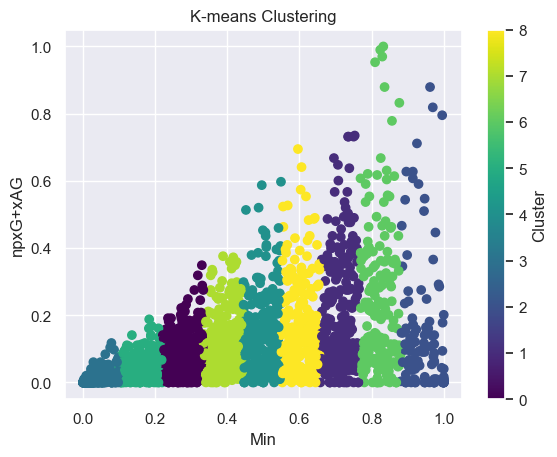

In [139]:
plt.scatter(df_scaled[:, 3], df_scaled[:, -1], c=cluster_labels, cmap='viridis')
plt.xlabel('Min')
plt.ylabel('npxG+xAG')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [138]:
#players_df.loc[players_df['Player'] == 'Lionel Messi']
#players_df.loc[players_df['Player'] == 'Erling Haaland']
#players_df.loc[players_df['Player'] == 'Kylian Mbappé']
players_df.loc[players_df['Player'] == 'Neymar']

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90,Weekly Wages,Annual Wages,Cluster
1527,Neymar,BRA,"MF,FW",Paris S-G,Ligue 1,30,1992,20,18,1545.0,...,0.64,1.28,0.47,0.51,0.98,0.38,0.89,1185143,61627439,4


In [136]:
cluster_6_data = players_df[players_df['Cluster'] == 6]

In [137]:
print(cluster_6_data['Player'].to_string(index=False))

           Salis Abdul Samed
      Trent Alexander-Arnold
                Ethan Ampadu
            Joachim Andersen
             Felipe Anderson
              Benjamin André
              Waldemar Anton
           Maximilian Arnold
                  Iago Aspas
                 Jordan Ayew
                 Srđan Babić
            Leonardo Balerdi
             Folarin Balogun
              Jonathan Bamba
               Harvey Barnes
                Gavin Bazunu
              Haris Belkebla
             Jude Bellingham
                Fran Beltrán
                  Jaka Bijol
              Philip Billing
                Ludovic Blas
                 Neto Borges
              Mehdi Bourabia
              Gleison Bremer
              Santiago Bueno
       Alessandro Buongiorno
             Leandro Cabrera
            Antonio Candreva
            Maxence Caqueret
             Lucas Chevalier
          Oliver Christensen
             Patrick Ciurria
                Carlos Clerc
           Las

In [144]:
cluster_characteristics = players_df.groupby('Cluster')[numerical_features].mean()
cluster_characteristics

,Age,MP,Starts,Min,Gls,Ast,G+A,G-PK,xG,xAG,npxG,npxG+xAG
Cluster,,,,,,,,,,,,
0,26.309859,19.598592,9.926056,951.468310,1.260563,0.919014,2.179577,1.147887,1.524296,0.979225,1.411620,2.392254
1,26.108434,31.791165,28.028112,2439.449799,3.518072,2.522088,6.040161,3.184739,3.456225,2.659036,3.129317,5.793574
2,27.322835,36.574803,36.149606,3220.874016,2.307087,1.716535,4.023622,2.031496,2.412598,2.033858,2.091339,4.122835
3,24.760391,5.222494,1.012225,132.525672,0.156479,0.107579,0.264059,0.141809,0.217115,0.130318,0.201711,0.330562
4,26.533865,26.693227,19.362550,1700.235060,2.482072,1.816733,4.298805,2.266932,2.611155,1.785259,2.396813,4.185259
5,25.955720,14.121771,5.405904,553.889299,0.671587,0.431734,1.103321,0.649446,0.796310,0.515498,0.769373,1.279705
6,26.258883,33.868020,32.177665,2806.350254,4.543147,2.888325,7.431472,4.065990,4.339594,3.022843,3.826904,6.851269
7,26.320611,23.702290,14.759542,1336.145038,2.183206,1.423664,3.606870,1.980916,2.248092,1.492366,2.024809,3.514122
8,26.355102,29.322449,23.608163,2056.216327,2.726531,2.028571,4.755102,2.481633,2.856735,2.125714,2.614694,4.743265


In [145]:
# Filter cluster_characteristics for Cluster 6 and Cluster 2
cluster_6 = cluster_characteristics.loc[6]
cluster_2 = cluster_characteristics.loc[2]

# Compare the mean values for each feature
comparison = pd.concat([cluster_6, cluster_2], axis=1)
comparison.columns = ['Cluster 6', 'Cluster 2']
print(comparison)


            Cluster 6    Cluster 2
Age         26.258883    27.322835
MP          33.868020    36.574803
Starts      32.177665    36.149606
Min       2806.350254  3220.874016
Gls          4.543147     2.307087
Ast          2.888325     1.716535
G+A          7.431472     4.023622
G-PK         4.065990     2.031496
xG           4.339594     2.412598
xAG          3.022843     2.033858
npxG         3.826904     2.091339
npxG+xAG     6.851269     4.122835


In [148]:
# Find the best player in each cluster based on overall performance
for cluster in range(k):
    cluster_data = players_df[players_df['Cluster'] == cluster]
    
    # Calculate the overall performance score based on all features
    cluster_data['OverallScore'] = cluster_data.iloc[:, 3:].sum(axis=1)
    
    # Sort the players within the cluster by the overall performance score
    sorted_cluster_data = cluster_data.sort_values(by='OverallScore', ascending=False)
    
    # Get the best player (first row) within the cluster
    best_player = sorted_cluster_data.iloc[0]
    
    print("Cluster", cluster)
    print("Best Player:")
    print(best_player[['Player', 'Age', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'G-PK', 'xG', 'xAG', 'npxG', 'npxG+xAG']])
    print()




Cluster 0
Best Player:
Player      Manuel Neuer
Age                   36
MP                    12
Starts                12
Min               1080.0
Gls                    0
Ast                    0
G+A                    0
G-PK                   0
xG                   0.2
xAG                  0.0
npxG                 0.2
npxG+xAG             0.2
Name: 1524, dtype: object

Cluster 1
Best Player:
Player      Frenkie de Jong
Age                      25
MP                       33
Starts                   29
Min                  2534.0
Gls                       2
Ast                       4
G+A                       6
G-PK                      2
xG                      2.4
xAG                     4.3
npxG                    2.4
npxG+xAG                6.7
Name: 1038, dtype: object

Cluster 2
Best Player:
Player      David de Gea
Age                   31
MP                    38
Starts                38
Min               3420.0
Gls                    0
Ast                    0
G+A          

/var/folders/xr/0gb_st7s2350r13lqy_zdfgr0000gn/T/ipykernel_41306/3123010385.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster_data['OverallScore'] = cluster_data.iloc[:, 3:].sum(axis=1)
/var/folders/xr/0gb_st7s2350r13lqy_zdfgr0000gn/T/ipykernel_41306/3123010385.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['OverallScore'] = cluster_data.iloc[:, 3:].sum(axis=1)
/var/folders/xr/0gb_st7s2350r13lqy_zdfgr0000gn/T/ipykernel_41306/3123010385.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in

In [342]:
players_df = pd.read_csv('./complete_playersv2.csv')

In [343]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the numerical features for clustering
numerical_features = [
    'Age', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', #'MP', 'Starts', 'Min', 
    'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
    'PrgP', 'PrgR', 'Gls90', 'Ast90', 'G+A90', 'G-PK90', 'G+A-PK90', 'xG90',
    'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90'
]

# Remove commas from numerical features and convert to float
for feature in numerical_features:
    if players_df[feature].dtype == 'O':  # Check if the feature is of object type (string)
        players_df[feature] = players_df[feature].str.replace(',', '').astype(float)

# Perform scaling on the numerical features
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(players_df[numerical_features])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the dataframe
players_df['Cluster'] = clusters

/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Felipe/an

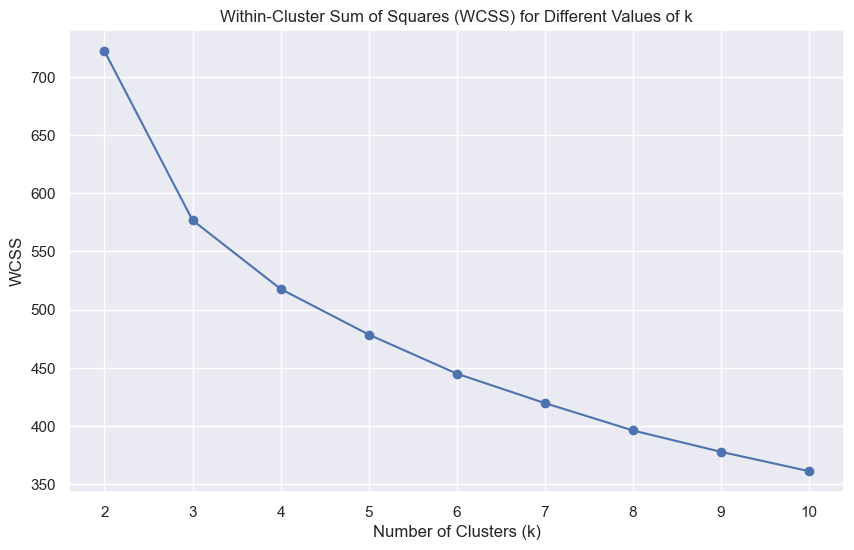

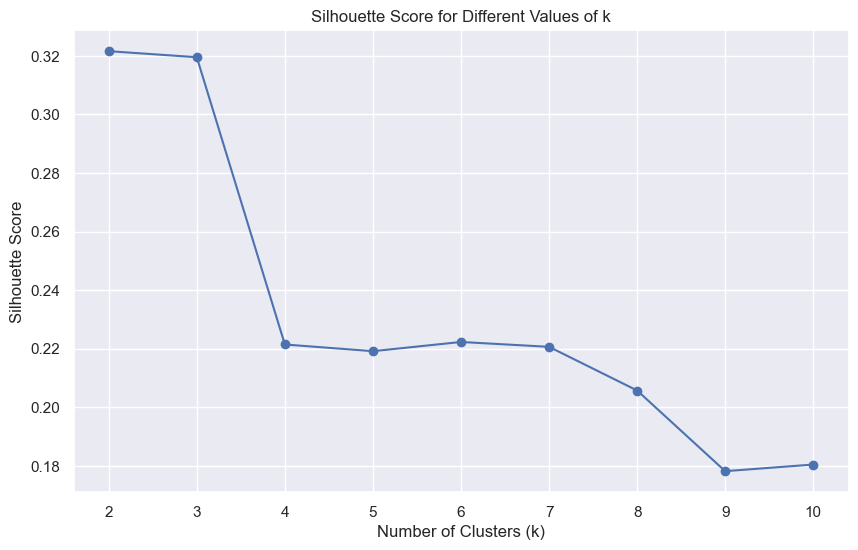

In [344]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
X = players_df[numerical_features]
# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

def evaluate_clustering(k, X, cluster_labels):
    kmeans = KMeans(n_clusters=k, random_state=50)
    kmeans.fit(X)
    
    # Calculate WCSS
    wcss = kmeans.inertia_
    
    # Calculate silhouette score
    silhouette = silhouette_score(X, kmeans.labels_)
    
    return wcss, silhouette

# Try different values of k
k_values = range(2, 11)
wcss_scores = []
silhouette_scores = []

for k in k_values:
    wcss, silhouette = evaluate_clustering(k, X_scaled, cluster_labels)
    wcss_scores.append(wcss)
    silhouette_scores.append(silhouette)

# Plot the WCSS scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Within-Cluster Sum of Squares (WCSS) for Different Values of k')
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()


In [345]:
k = 6 # Set the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)

# Perform clustering
kmeans.fit(players_df[numerical_features])

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the dataset
players_df['Cluster'] = cluster_labels

# Print the cluster assignments
print(players_df[['Player', 'Cluster']])

/Users/Felipe/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                 Player  Cluster
0      Brenden Aaronson        0
1      Yunis Abdelhamid        4
2         Himad Abdelli        0
3     Salis Abdul Samed        4
4       Laurent Abergel        0
...                 ...      ...
2290   Martín Zubimendi        4
2291   Szymon Żurkowski        3
2292    Martin Ødegaard        4
2293        Milan Đurić        5
2294      Filip Đuričić        0

[2295 rows x 2 columns]


In [346]:
for cluster in range(k):
    cluster_data = players_df[players_df['Cluster'] == cluster]['Player']
    print("Cluster", cluster)
    print(cluster_data)
    print()

Cluster 0
0        Brenden Aaronson
2           Himad Abdelli
4         Laurent Abergel
6       Zakaria Aboukhlal
7           Tammy Abraham
              ...        
2261      Nicola Zalewski
2275        Robin Zentner
2279      Piotr Zieliński
2289        Igor Zubeldia
2294        Filip Đuričić
Name: Player, Length: 381, dtype: object

Cluster 1
5           Matthis Abline
14          Sargis Adamyan
20        Felix Afena-Gyan
22      Julen Agirrezabala
32                Ola Aina
               ...        
2268          Oier Zarraga
2271         Mehdi Zeffane
2274          Arber Zeneli
2282        Joshua Zirkzee
2283          Hakim Ziyech
Name: Player, Length: 395, dtype: object

Cluster 2
11             Marcos Acuña
12                Che Adams
15         Tosin Adarabioyo
25            Álvaro Aguado
27             Nayef Aguerd
               ...         
2248         Jawad El Yamiq
2249             Ryan Yates
2253           Ashley Young
2281    Oleksandr Zinchenko
2287             Kurt Z

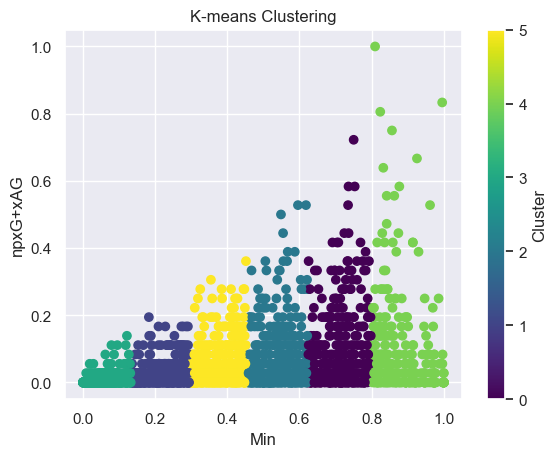

In [356]:
plt.scatter(df_scaled[:, 1], df_scaled[:, 3], c=cluster_labels, cmap='viridis')
plt.xlabel('Min')
plt.ylabel('npxG+xAG')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [246]:
players_df.loc[players_df['Player'] == 'Lionel Messi']
#players_df.loc[players_df['Player'] == 'Erling Haaland']
#players_df.loc[players_df['Player'] == 'Kylian Mbappé']


,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90,Weekly Wages,Annual Wages,Cluster
1415,Lionel Messi,ARG,"FW,MF",Paris S-G,Ligue 1,35,1987,32,32,2837.0,...,0.51,1.02,0.49,0.43,0.92,0.49,0.92,1338228,69587833,3


In [301]:
cluster_characteristics = players_df.groupby('Cluster')[numerical_features].mean()
cluster_characteristics

,Age,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,...,Gls90,Ast90,G+A90,G-PK90,G+A-PK90,xG90,xAG90,xG+xAG90,npxG90,npxG+xAG90
Cluster,,,,,,,,,,,,,,,,,,,,,
0,26.065617,2423.679790,26.927297,3.372703,2.401575,5.774278,3.078740,0.293963,0.364829,5.013123,...,0.124357,0.088556,0.212966,0.113570,0.202047,0.124724,0.094724,0.219370,0.114121,0.208556
1,26.162025,743.640506,8.263038,0.924051,0.637975,1.562025,0.865823,0.058228,0.073418,1.810127,...,0.110380,0.074886,0.185215,0.103747,0.178608,0.137114,0.084709,0.221848,0.129949,0.214785
2,26.546154,1842.200000,20.467949,2.617949,1.951282,4.569231,2.384615,0.233333,0.292308,4.046154,...,0.127385,0.095231,0.222564,0.116077,0.211128,0.135051,0.096205,0.230949,0.123821,0.219590
3,24.826360,171.730126,1.907322,0.202929,0.140167,0.343096,0.188285,0.014644,0.018828,0.512552,...,0.084414,0.082887,0.167322,0.079121,0.162029,0.127490,0.089184,0.216632,0.121778,0.210941
4,26.802239,3029.690299,33.664179,3.600746,2.391791,5.992537,3.167910,0.432836,0.604478,4.884328,...,0.109552,0.072985,0.182761,0.096493,0.169627,0.106903,0.078321,0.185037,0.092463,0.170522
5,26.428198,1291.877285,14.352742,2.083551,1.375979,3.459530,1.890339,0.193211,0.263708,3.002611,...,0.143290,0.095796,0.239426,0.129922,0.225875,0.148251,0.099687,0.247755,0.133890,0.233342


In [351]:
# Find the best player in each cluster based on overall performance
for cluster in range(k):
    cluster_data = players_df[players_df['Cluster'] == cluster]
    
    
    cluster_data['OverallScore'] = cluster_data.iloc[:, 3:].sum(axis=1)
    
    
    sorted_cluster_data = cluster_data.sort_values(by='OverallScore', ascending=False)
    
    
    best_player = sorted_cluster_data.iloc[0]
    
    print("Cluster", cluster)
    print("Best Player:")
    print(best_player[[
    'Player','Age', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK',
    'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC',
    'PrgP', 'PrgR', 'Gls90', 'Ast90', 'G+A90', 'G-PK90', 'G+A-PK90', 'xG90',
    'xAG90', 'xG+xAG90', 'npxG90', 'npxG+xAG90'
]])
    print()

Cluster 0
Best Player:
Player        Frenkie de Jong
Age                        25
MP                         33
Starts                     29
Min                    2534.0
90s                      28.2
Gls                         2
Ast                         4
G+A                         6
G-PK                        2
PK                          0
PKatt                       0
CrdY                        3
CrdR                        0
xG                        2.4
npxG                      2.4
xAG                       4.3
npxG+xAG                  6.7
PrgC                     92.0
PrgP                    279.0
PrgR                     83.0
Gls90                    0.07
Ast90                    0.14
G+A90                    0.21
G-PK90                   0.07
G+A-PK90                 0.21
xG90                     0.09
xAG90                    0.15
xG+xAG90                 0.24
npxG90                   0.09
npxG+xAG90               0.24
Name: 1038, dtype: object

Cluster 1
Best Playe

/var/folders/xr/0gb_st7s2350r13lqy_zdfgr0000gn/T/ipykernel_41306/3319727792.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster_data['OverallScore'] = cluster_data.iloc[:, 3:].sum(axis=1)
/var/folders/xr/0gb_st7s2350r13lqy_zdfgr0000gn/T/ipykernel_41306/3319727792.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['OverallScore'] = cluster_data.iloc[:, 3:].sum(axis=1)
/var/folders/xr/0gb_st7s2350r13lqy_zdfgr0000gn/T/ipykernel_41306/3319727792.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in

In [276]:
# Calculate the average values of numerical features for each cluster
cluster_stats = players_df.groupby('Cluster')[numerical_features].mean()

# Identify the cluster with the highest average values
best_cluster = cluster_stats.idxmax()


In [277]:
best_cluster

Age           4
Min           4
90s           4
Gls           4
Ast           0
G+A           4
G-PK          4
PK            4
PKatt         4
CrdY          0
CrdR          0
xG            4
npxG          0
xAG           4
npxG+xAG      0
PrgC          0
PrgP          4
PrgR          0
Gls90         5
Ast90         5
G+A90         5
G-PK90        5
G+A-PK90      5
xG90          5
xAG90         5
xG+xAG90      5
npxG90        5
npxG+xAG90    5
dtype: int64

In [260]:
# cluster_3_data = players_df[players_df['Cluster'] == 3]
# print(cluster_3_data['Player'].to_string(index=False))

In [261]:
# cluster_4_data = players_df[players_df['Cluster'] == 4]
# print(cluster_4_data['Player'].to_string(index=False))

In [227]:
# import random

# def get_cluster_players(player_name):
#     # Find the cluster of the specified player
#     player_cluster = players_df[players_df['Player'] == player_name]['Cluster'].values[0]

#     # Filter players belonging to the same cluster
#     cluster_players = players_df[players_df['Cluster'] == player_cluster]

#     # Select five random players from the same cluster (excluding the specified player)
#     random_players = cluster_players[cluster_players['Player'] != player_name].sample(n=5)

#     return player_cluster, random_players

# # Set the number of times to try
# num_tries = 3

# # Loop for the specified number of tries
# for _ in range(num_tries):
#     # Get input from the user for the player's name
#     player_name = input("Enter a player's name: ")

#     # Call the function to get the cluster and random players
#     player_cluster, random_players = get_cluster_players(player_name)

#     # Print the results
#     print("Player:", player_name)
#     print("Cluster:", player_cluster)
#     print("Random Players from the Same Cluster:")
#     print(random_players[['Player', 'Cluster']])
#     print()


In [226]:
# import random

# def get_cluster_players(player_name):
#     # Find the cluster of the specified player
#     player_cluster = players_df[players_df['Player'] == player_name]['Cluster'].values[0]

#     # Filter players belonging to the same cluster
#     cluster_players = players_df[players_df['Cluster'] == player_cluster]

#     # Select five random players from the same cluster (excluding the specified player)
#     random_players = cluster_players[cluster_players['Player'] != player_name].sample(n=5)

#     return player_cluster, random_players

# # Infinite loop
# while True:
#     # Get input from the user for the player's name
#     player_name = input("Enter a player's name (or 'exit' to quit): ")

#     if player_name.lower() == 'exit':
#         # Exit the loop if the user enters 'exit'
#         break

#     # Call the function to get the cluster and random players
#     player_cluster, random_players = get_cluster_players(player_name)

#     # Print the results
#     print("Player:", player_name)
#     print("Cluster:", player_cluster)
#     print("Random Players from the Same Cluster:")
#     print(random_players[['Player', 'Cluster']])
#     print()


In [225]:
# import random

# def get_cluster_players(player_name):
    
#     """"By calling this function and passing a player's name as input, 
#     you can retrieve the player's cluster, 
#     along with five random players from the same cluster, 
#     and view the statistical summary of the cluster's features."""
    
#     # Find the cluster 
#     player_cluster = players_df[players_df['Player'] == player_name]['Cluster'].values[0]

    
#     cluster_players = players_df[players_df['Cluster'] == player_cluster]

#     # Select five random players from the same cluster
#     random_players = cluster_players[cluster_players['Player'] != player_name].sample(n=5)

#     # stats
#     cluster_stats = cluster_players.describe()

#     return player_cluster, random_players, cluster_stats


# while True:
    
#     player_name = input("Enter a player's name (or 'exit' to quit): ")

#     if player_name.lower() == 'exit':
#         # Exit the loop if the user enters 'exit'
#         break

#     # Call the function 
#     player_cluster, random_players, cluster_stats = get_cluster_players(player_name)

    
#     print("Player:", player_name)
#     print("Cluster:", player_cluster)
#     print("Random Players from the Same Cluster:")
#     print(random_players[['Player', 'Cluster']])
#     print()

    
#     print("Cluster Stats:")
#     print(cluster_stats)
#     print()


In [224]:
# # import random

# def get_cluster_players(player_name, players_df):

 
    
#     # Find the cluster of the specified player
#     player_row = players_df.loc[players_df['Player'] == player_name]
#     player_cluster = player_row['Cluster'].values[0]

#     # Filter players belonging to the same cluster
#     cluster_players = players_df.loc[players_df['Cluster'] == player_cluster]

#     # Exclude the specified player from random player selection
#     cluster_players = cluster_players.loc[cluster_players['Player'] != player_name]

#     # Select five random players from the same cluster
#     random_players = cluster_players.sample(n=5)

#     # Get the cluster stats
#     cluster_stats = cluster_players.describe()

#     # Print the player's cluster
#     print(f"Player: {player_name}")
#     print(f"Cluster: {player_cluster}\n")

#     # Print five random players
#     print("Random Players:")
#     print(random_players[['Player', 'Age', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']].to_string(index=False))

#     # Print the cluster stats
#     print("\nCluster Stats:")
#     print(cluster_stats[['Age', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']].to_string())

# # Example usage
# player_name = input("Enter the player's name: ")
# get_cluster_players(player_name, players_df)



In [279]:
def get_cluster_players(player_name, players_df):
    """"By calling this function and passing a player's name as input, 
     you can retrieve the player's cluster, 
     along with five random players from the same cluster, 
     and view the statistical summary of the cluster's features."""
    
    # Find the cluster of the specified player
    player_row = players_df.loc[players_df['Player'] == player_name]
    player_cluster = player_row['Cluster'].values[0]

    # Filter players belonging to the same cluster
    cluster_players = players_df.loc[players_df['Cluster'] == player_cluster]

    # Exclude the specified player from random player selection
    cluster_players = cluster_players.loc[cluster_players['Player'] != player_name]

    # Select five random players from the same cluster
    random_players = cluster_players.sample(n=5)

    # Get the chosen player's stats
    player_stats = player_row[['Age', 'Pos', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']]

    # Get the cluster stats
    cluster_stats = cluster_players.describe()

    # Print the player's cluster
    print(f"Player: {player_name}")
    print(f"Cluster: {player_cluster}\n")

    # Print the chosen player's stats
    print("Player Stats:")
    print(player_stats.to_string(index=False))
    print()

    # Print five random players
    print("Random Players:")
    print(random_players[['Player', 'Age', 'Pos', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']].to_string(index=False))

    # Print the cluster stats
    print("\nCluster Stats:")
    print(cluster_stats[['Age', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']].to_string())

# Example usage
while True:
    player_name = input("Enter the player's name (type 'exit' to quit): ")
    if player_name.lower() == 'exit':
        break
    get_cluster_players(player_name, players_df)
    print("\n")  # Add an empty line between each player's information



Enter the player's name (type 'exit' to quit): Lionel Messi
Player: Lionel Messi
Cluster: 4

Player Stats:
 Age   Pos  MP  Starts    Min  Gls  Ast  G+A   xG  xAG  npxG  npxG+xAG
  35 FW,MF  32      32 2837.0   16   16   32 15.5 13.4  15.5      28.9

Random Players:
             Player  Age Pos  MP  Starts    Min  Gls  Ast  G+A   xG  xAG  npxG  npxG+xAG
        Axel Disasi   24  DF  38      37 3330.0    3    3    6  3.8  1.2   3.0       4.2
Alexandre Lacazette   31  FW  35      34 2929.0   27    5   32 24.1  5.4  17.8      23.2
    Marco Silvestri   31  GK  38      38 3420.0    0    0    0  0.0  0.0   0.0       0.0
             Walace   27  MF  37      37 3190.0    0    1    1  1.1  1.7   1.1       2.8
        Declan Rice   23  MF  37      36 3273.0    4    1    5  2.4  3.2   1.6       4.8

Cluster Stats:
              Age          Min         Gls         Ast         G+A          xG         xAG        npxG    npxG+xAG
count  267.000000   267.000000  267.000000  267.000000  267.000000  2

Enter the player's name (type 'exit' to quit): Lionel Messi
Player: Lionel Messi
Cluster: 4

Player Stats:
 Age   Pos  MP  Starts    Min  Gls  Ast  G+A   xG  xAG  npxG  npxG+xAG
  35 FW,MF  32      32 2837.0   16   16   32 15.5 13.4  15.5      28.9



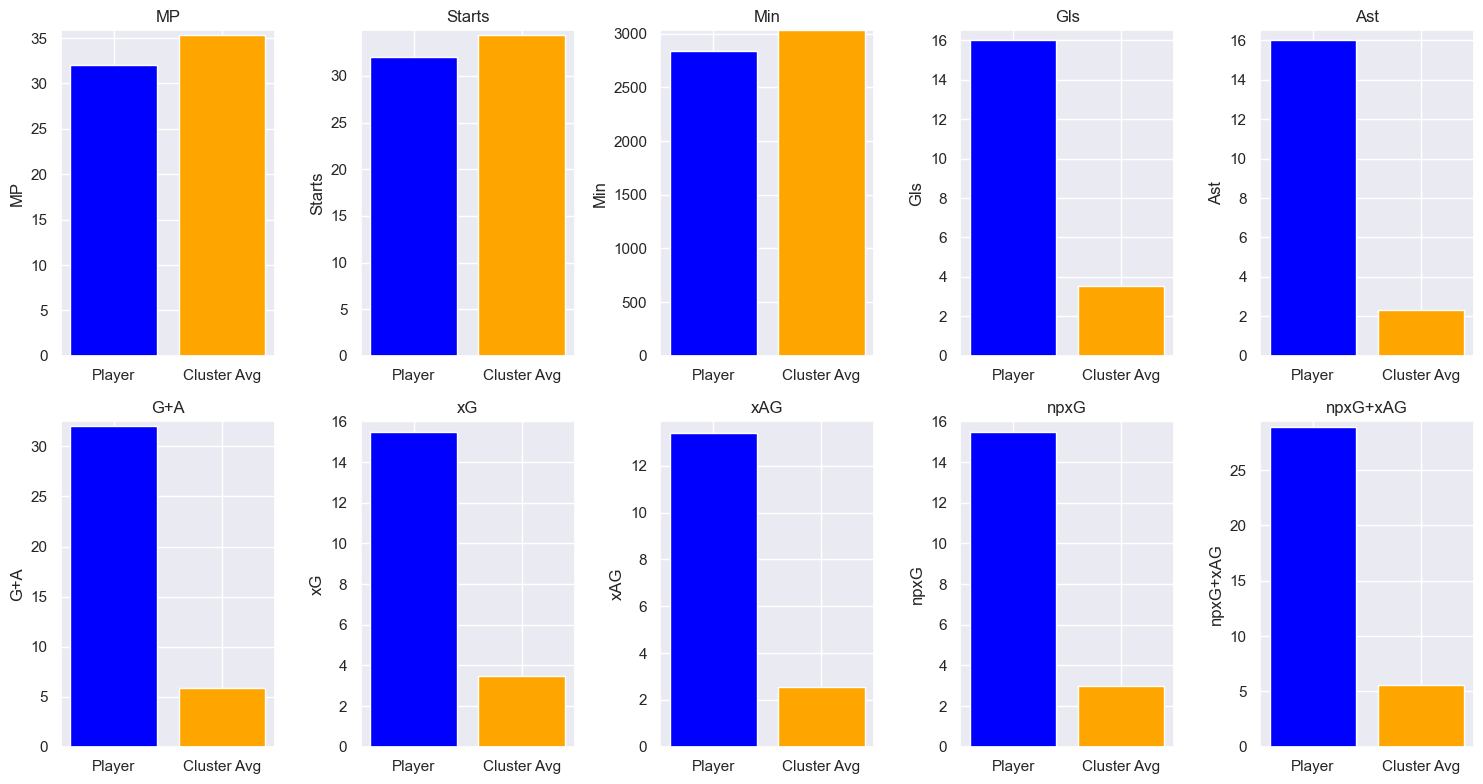

Random Players:
           Player  Age   Pos  MP  Starts    Min  Gls  Ast  G+A   xG  xAG  npxG  npxG+xAG
Pierre Lees-Melou   29    MF  32      32 2767.0    5    5   10  2.1  2.3   2.1       4.4
   Jonathan David   22    FW  37      36 3166.0   24    4   28 23.6  6.1  15.1      21.2
 Łukasz Skorupski   31    GK  37      37 3330.0    0    0    0  0.0  0.0   0.0       0.0
     Jarrod Bowen   25 FW,MF  38      36 3233.0    6    5   11  8.9  7.4   7.8      15.2
  Matthias Ginter   28    DF  34      34 3060.0    4    1    5  1.9  0.9   1.9       2.9

Cluster Stats:
              Age          Min         Gls         Ast         G+A          xG         xAG        npxG    npxG+xAG
count  267.000000   267.000000  267.000000  267.000000  267.000000  267.000000  267.000000  267.000000  267.000000
mean    26.771536  3030.411985    3.554307    2.340824    5.895131    3.473034    2.550187    2.991386    5.540824
std      3.660942   209.607875    5.626188    2.770674    7.434694    5.094345    2.82871

In [284]:
import matplotlib.pyplot as plt

def get_cluster_players(player_name, players_df):
    """By calling this function and passing a player's name as input, 
    you can retrieve the player's cluster, 
    along with five random players from the same cluster, 
    and view the statistical summary of the cluster's features."""

    # Find the cluster of the specified player
    player_row = players_df.loc[players_df['Player'] == player_name]
    player_cluster = player_row['Cluster'].values[0]

    # Filter players belonging to the same cluster
    cluster_players = players_df.loc[players_df['Cluster'] == player_cluster]

    # Exclude the specified player from random player selection
    cluster_players = cluster_players.loc[cluster_players['Player'] != player_name]

    # Select five random players from the same cluster
    random_players = cluster_players.sample(n=5)

    # Get the chosen player's stats
    player_stats = player_row[['Age', 'Pos', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']]

    # Get the cluster stats
    cluster_stats = cluster_players.describe()

    # Print the player's cluster
    print(f"Player: {player_name}")
    print(f"Cluster: {player_cluster}\n")

    # Print the chosen player's stats
    print("Player Stats:")
    print(player_stats.to_string(index=False))
    print()

    # Plot bar graphs comparing the player's stats with cluster average
    categories = ['MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
    axes = axes.flatten()

    for i, category in enumerate(categories):
        ax = axes[i]
        player_value = player_stats[category].values[0]
        cluster_average = cluster_stats.loc['mean', category]
        ax.bar(['Player', 'Cluster Avg'], [player_value, cluster_average], color=['blue', 'orange'])
        ax.set_title(category)
        ax.set_ylabel(category)
        ax.set_ylim([0, max(player_value, cluster_average) + 0.5])

    plt.tight_layout()
    plt.show()

    # Print five random players
    print("Random Players:")
    print(random_players[['Player', 'Age', 'Pos', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']].to_string(index=False))

    # Print the cluster stats
    print("\nCluster Stats:")
    print(cluster_stats[['Age', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']].to_string())

# Example usage
while True:
    player_name = input("Enter the player's name (type 'exit' to quit): ")
    if player_name.lower() == 'exit':
        break
    get_cluster_players(player_name, players_df)
    print("\n")  # Add an empty line between each player's information


In [358]:
import matplotlib.pyplot as plt

def get_cluster_players(player_name, players_df):
    """By calling this function and passing a player's name as input, 
    you can retrieve the player's cluster, 
    along with five random players from the same cluster, 
    and view the statistical summary of the cluster's features."""

    # Find the cluster of the specified player
    player_row = players_df.loc[players_df['Player'] == player_name]
    player_cluster = player_row['Cluster'].values[0]

    # Filter players belonging to the same cluster
    cluster_players = players_df.loc[players_df['Cluster'] == player_cluster]

    # Exclude the specified player from random player selection
    cluster_players = cluster_players.loc[cluster_players['Player'] != player_name]

    # Select five random players from the same cluster
    random_players = cluster_players.sample(n=5)

    # Get the chosen player's stats
    player_stats = player_row[['Age', 'Pos', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']]

    # Get the cluster stats
    cluster_stats = cluster_players.describe()
    cluster_stats_all = players_df.groupby('Cluster').describe()

    # Print the player's cluster
    print(f"Player: {player_name}")
    print(f"Cluster: {player_cluster}\n")

    # Plot bar graphs comparing the player's stats with cluster and other cluster averages
    categories = ['MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
    axes = axes.flatten()

    for i, category in enumerate(categories):
        ax = axes[i]
        player_value = player_stats[category].values[0]
        cluster_average = cluster_stats.loc['mean', category]
        other_clusters_averages = cluster_stats_all.loc[:, (category, 'mean')].values
        cluster_labels = [str(label) for label in cluster_stats_all.index]  # Convert cluster labels to strings
        ax.bar(['Player', 'Cluster Avg'] + cluster_labels, [player_value, cluster_average] + list(other_clusters_averages), 
               color=['blue', 'orange'] + ['lightgray'] * len(cluster_labels))
        ax.set_title(category)
        ax.set_ylabel(category)
        ax.set_ylim([0, max(player_value, cluster_average, max(other_clusters_averages)) + 0.5])
        ax.set_xticks(range(len(['Player', 'Cluster Avg'] + cluster_labels)))
        ax.set_xticklabels(['Player', 'Cluster Avg'] + cluster_labels, rotation=90)

    plt.tight_layout()
    plt.show()

    # Print five random players
    print("Random Players:")
    print(random_players[['Player', 'Age', 'Pos', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']].to_string(index=False))

    # Print the cluster stats
    print("\nCluster Stats:")
    print(cluster_stats[['Age', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']].to_string())

# Example usage
while True:
    player_name = input("Enter the player's name (type 'exit' to quit): ")
    if player_name.lower() == 'exit':
        break
    get_cluster_players(player_name, players_df)
    print("\n")  # Add an empty line between each player's information



Enter the player's name (type 'exit' to quit): exit


Enter the player's name (type 'exit' to quit): Erling Haaland
Player: Erling Haaland
Cluster: 4

Player Stats:
 Age Pos  MP  Starts    Min  Gls  Ast  G+A   xG  xAG  npxG  npxG+xAG
  22  FW  35      33 2769.0   36    8   44 28.4  5.3  23.1      28.4

Random Players:
        Player  Age Pos  MP  Starts    Min  Gls  Ast  G+A  xG  xAG  npxG  npxG+xAG
  Joseph Aidoo   26  DF  35      35 3119.0    3    0    3 1.0  0.1   1.0       1.1
  Rui Patrício   34  GK  35      35 3150.0    0    0    0 0.0  0.0   0.0       0.0
Antonio Raillo   30  DF  31      31 2766.0    2    3    5 0.6  1.1   0.6       1.7
  Alban Lafont   23  GK  37      37 3329.0    0    0    0 0.0  0.1   0.0       0.1
    Jaka Bijol   23  DF  32      32 2728.0    3    2    5 2.2  1.6   2.2       3.9

Cluster Stats:
              Age          Min         Gls         Ast         G+A          xG         xAG        npxG    npxG+xAG
count  267.000000   267.000000  267.000000  267.000000  267.000000  267.000000  267.000000  267.000000  2

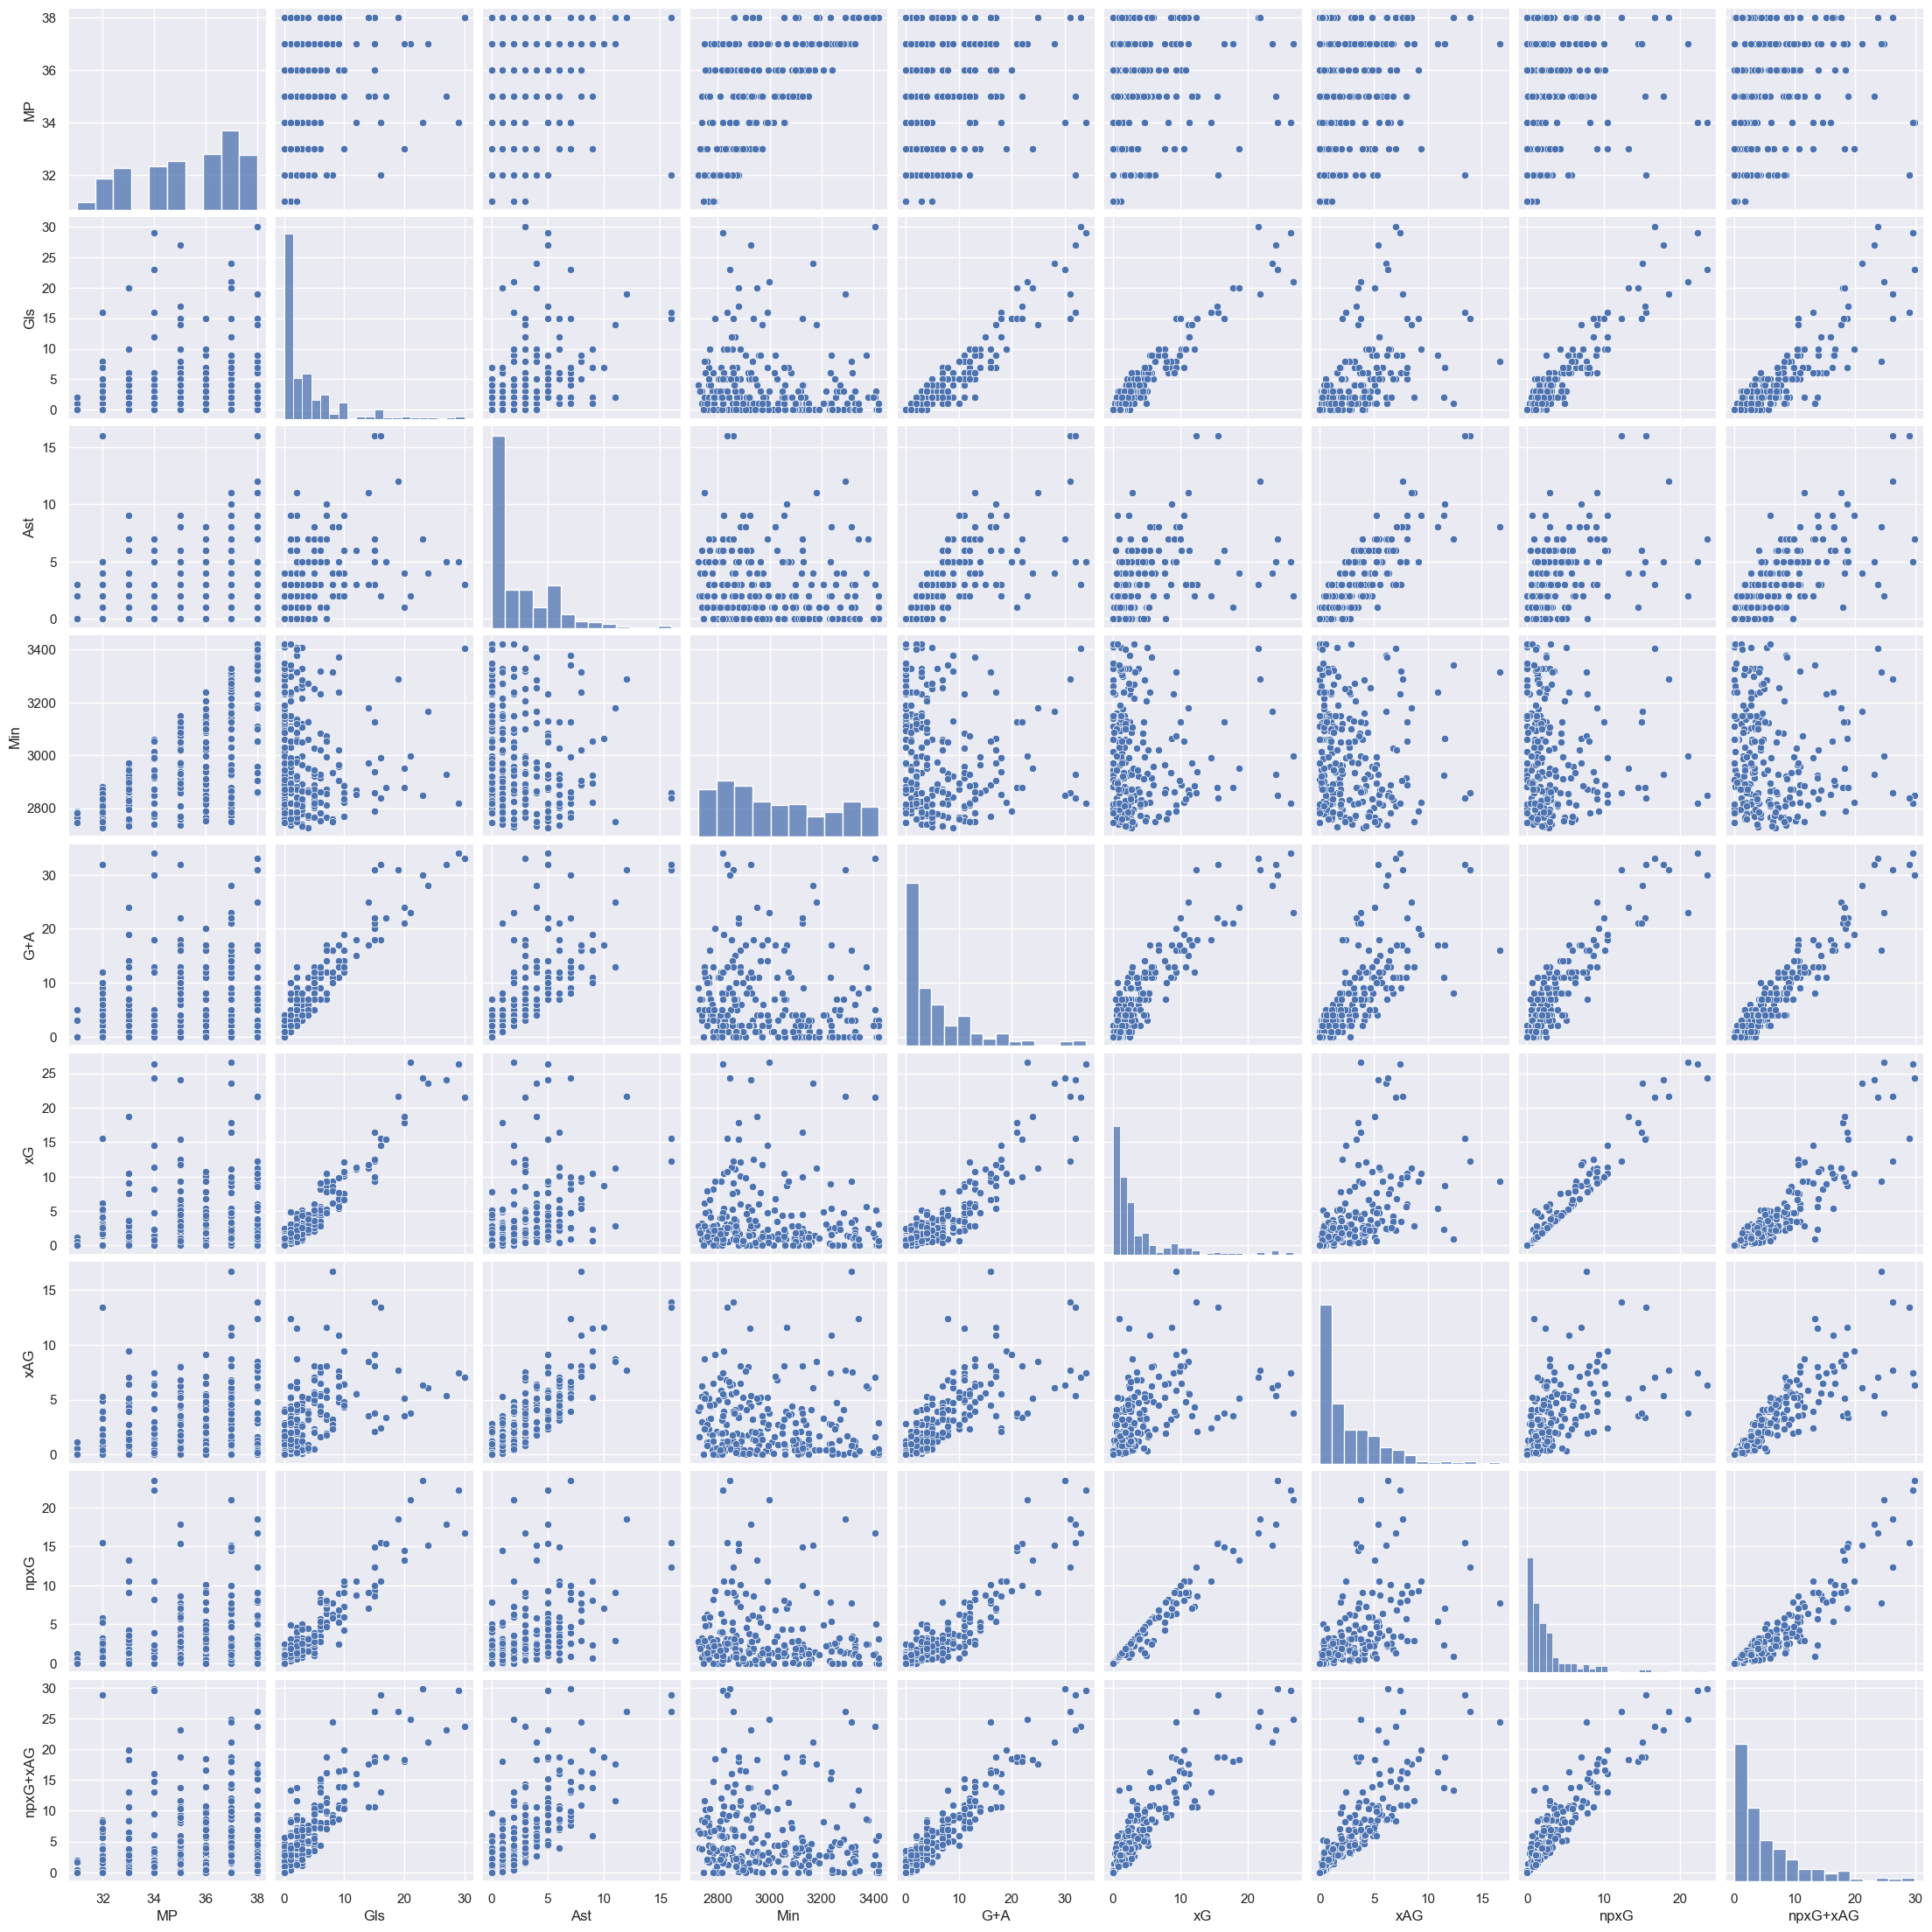



Enter the player's name (type 'exit' to quit): exit


In [353]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_cluster_players(player_name, players_df):
    """By calling this function and passing a player's name as input,
    you can retrieve the player's cluster,
    along with five random players from the same cluster,
    view the statistical summary of the cluster's features,
    and visualize the scatter plot matrix of player attributes within the cluster."""

    # Find the cluster of the specified player
    player_row = players_df.loc[players_df['Player'] == player_name]
    player_cluster = player_row['Cluster'].values[0]

    # Filter players belonging to the same cluster
    cluster_players = players_df.loc[players_df['Cluster'] == player_cluster]

    # Exclude the specified player from random player selection
    cluster_players = cluster_players.loc[cluster_players['Player'] != player_name]

    # Select five random players from the same cluster
    random_players = cluster_players.sample(n=5)

    # Get the chosen player's stats
    player_stats = player_row[['Age', 'Pos', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']]

    # Get the cluster stats
    cluster_stats = cluster_players.describe()

    # Print the player's cluster
    print(f"Player: {player_name}")
    print(f"Cluster: {player_cluster}\n")

    # Print the chosen player's stats
    print("Player Stats:")
    print(player_stats.to_string(index=False))
    print()

    # Print five random players
    print("Random Players:")
    print(random_players[['Player', 'Age', 'Pos', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']].to_string(index=False))

    # Print the cluster stats
    print("\nCluster Stats:")
    print(cluster_stats[['Age', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']].to_string())

    # Create scatter plot matrix
    attributes = ['MP', 'Gls', 'Ast', 'Min', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']
    sns.pairplot(data=cluster_players, vars=attributes)
    plt.show()

# Example usage
while True:
    player_name = input("Enter the player's name (type 'exit' to quit): ")
    if player_name.lower() == 'exit':
        break
    get_cluster_players(player_name, players_df)
    print("\n")


Enter the player's name (type 'exit' to quit): David de Gea
Player: David de Gea
Cluster: 4

Player Stats:
 Age Pos  MP  Starts    Min  Gls  Ast  G+A  xG  xAG  npxG  npxG+xAG
  31  GK  38      38 3420.0    0    0    0 0.0  0.1   0.0       0.1

Random Players:
               Player  Age   Pos  MP  Starts    Min  Gls  Ast  G+A  xG  xAG  npxG  npxG+xAG
   Stole Dimitrievski   28    GK  37      37 3324.0    0    0    0 0.0  0.0   0.0       0.0
     Łukasz Skorupski   31    GK  37      37 3330.0    0    0    0 0.0  0.0   0.0       0.0
Isaac Palazón Camacho   27 FW,MF  37      36 2965.0    9    5   14 7.7  5.2   5.3      10.5
      Bruno Guimarães   24    MF  32      32 2726.0    4    5    9 2.8  4.0   2.8       6.8
            Nick Pope   30    GK  37      37 3261.0    0    0    0 0.0  0.1   0.0       0.1

Cluster Stats:
              Age          Min         Gls         Ast         G+A          xG         xAG        npxG    npxG+xAG
count  267.000000   267.000000  267.000000  267.000000  2

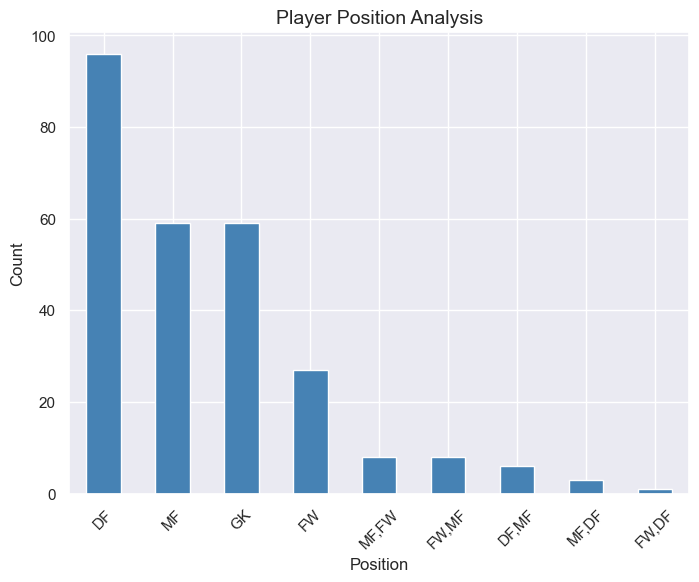



Enter the player's name (type 'exit' to quit): exit


In [354]:
import matplotlib.pyplot as plt

def get_cluster_players(player_name, players_df):
    """By calling this function and passing a player's name as input,
    you can retrieve the player's cluster,
    along with five random players from the same cluster,
    and view the statistical summary of the cluster's features.
    It also includes a player position analysis."""

    # Find the cluster of the specified player
    player_row = players_df.loc[players_df['Player'] == player_name]
    if player_row.empty:
        print("Player not found.")
        return
    player_cluster = player_row['Cluster'].values[0]

    # Filter players belonging to the same cluster
    cluster_players = players_df.loc[players_df['Cluster'] == player_cluster]

    # Exclude the specified player from random player selection
    cluster_players = cluster_players.loc[cluster_players['Player'] != player_name]

    # Select five random players from the same cluster
    random_players = cluster_players.sample(n=5)

    # Get the chosen player's stats
    player_stats = player_row[['Age', 'Pos', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']]

    # Get the cluster stats
    cluster_stats = cluster_players.describe()

    # Print the player's cluster
    print(f"Player: {player_name}")
    print(f"Cluster: {player_cluster}\n")

    # Print the chosen player's stats
    print("Player Stats:")
    print(player_stats.to_string(index=False))
    print()

    # Print five random players
    print("Random Players:")
    print(random_players[['Player', 'Age', 'Pos', 'MP', 'Starts', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']].to_string(index=False))

    # Print the cluster stats
    print("\nCluster Stats:")
    print(cluster_stats[['Age', 'Min', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'npxG', 'npxG+xAG']].to_string())

    # Player position analysis
    plt.figure(figsize=(8, 6))
    positions = cluster_players['Pos'].value_counts()
    positions.plot(kind='bar', color='steelblue')
    plt.title('Player Position Analysis', fontsize=14)
    plt.xlabel('Position')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Example usage
while True:
    player_name = input("Enter the player's name (type 'exit' to quit): ")
    if player_name.lower() == 'exit':
        break
    get_cluster_players(player_name, players_df)
    print("\n")  # Add an empty line between each player's information


In [ ]:
#Compararlo por posiciones.